In [1]:
import dimspy
import os
import cPickle as pickle

data_directory = "/home/keo7/Data/dimspy-example/"

In [2]:
spectrum_list = dimspy.SpectrumList()

parameters = {
    "MS1 Precision" : 1e-6,
    "MSn Precision" : 1e-6,
    "Measured Precision" : 0.01,
    "Scan Range" : "apex",
    "Peak Type" : "peaks"
}

for index, file in enumerate(os.listdir(data_directory)):
    if file.endswith(".p"):
        pass
    else:
        spectrum = dimspy.Spectrum(os.path.join(data_directory, file),
                                   polarity="positive",
                                   injection_order=index,
                                   parameters=parameters)
        spectrum_list.append(spectrum)

In [10]:
pickle.dump(spectrum_list, open(os.path.join(data_directory, "sl.p"), "wb"), -1)

In [50]:
spectrum_list = pickle.load(open(os.path.join(data_directory, "sl.p"), "rb"))

In [51]:
spectrum_list.to_list()

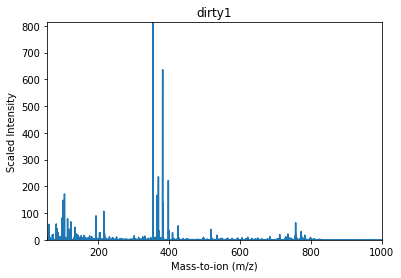

In [52]:
for spectrum in spectrum_list.to_list():
    spectrum.plot(scaled=True)
    break

In [53]:
processor = dimspy.SpectrumListProcessor(spectrum_list)

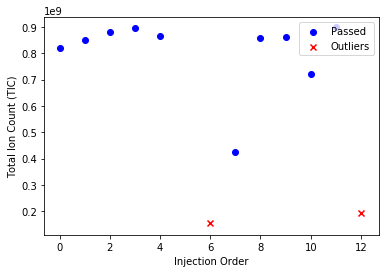

In [54]:
processor.outlier_detection(plot=True, mad_threshold=2)

In [55]:
for spectrum in processor.to_list():
    print spectrum.id

dirty1
dirty2
C030
C029
MM03
MM02
MM01
MM04
C032
C027


In [56]:
for i in processor.to_list():
    i.transform()
    i.normalise()

In [57]:
processor.binning(bin_size=0.25, n_jobs=8, statistic="mean", inplace=True)

In [58]:
processor.center(n_jobs=8)

In [59]:
processor.value_imputation(threshold=0.8)

In [60]:
p_sl = processor.to_spectrumlist()

In [61]:
p_sl.flatten_to_dataframe()

,55.0,55.5,55.75,56.0,56.25,56.5,56.75,57.0,57.25,57.5,...,878.75,884.25,884.5,885.5,893.5,902.5,907.5,923.5,935.75,961.5
dirty1,0.000449,0.000352,0.000362,0.000561,0.000369,0.000371,0.000358,0.000374,0.000348,0.000350,...,0.000354,0.000367,0.000395,0.000353,0.000363,0.000361,0.000363,0.000351,0.000372,0.000370
dirty2,0.000410,0.000355,0.000365,0.000391,0.000346,0.000345,0.000407,0.000367,0.000362,0.000318,...,0.000370,0.000368,0.000371,0.000372,0.000396,0.000372,0.000391,0.000362,0.000428,0.000369
C030,0.000637,0.000581,0.000578,0.000643,0.000592,0.000588,0.000583,0.000580,0.000594,0.000579,...,0.000384,0.000354,0.000711,0.000593,0.000653,0.000557,0.000390,0.000391,0.000402,0.000525
C029,0.000462,0.000359,0.000347,0.000389,0.000413,0.000352,0.000348,0.000415,0.000356,0.000352,...,0.000348,0.000345,0.000386,0.000345,0.000405,0.000433,0.000384,0.000394,0.000372,0.000345
MM03,0.000250,0.000223,0.000232,0.000293,0.000241,0.000235,0.000236,0.000247,0.000238,0.000232,...,0.000227,0.000254,0.000268,0.000234,0.000253,0.000259,0.000243,0.000251,0.000247,0.000260
MM02,0.000513,0.000441,0.000450,0.000580,0.000421,0.000423,0.000439,0.000536,0.000397,0.000435,...,0.000384,0.000440,0.000408,0.000490,0.000421,0.000378,0.000390,0.000391,0.000414,0.000432
MM01,0.000390,0.000354,0.000339,0.000426,0.000345,0.000348,0.000351,0.000371,0.000337,0.000344,...,0.000362,0.000343,0.000352,0.000377,0.000429,0.000344,0.000407,0.000340,0.000415,0.000333
MM04,0.000302,0.000277,0.000286,0.000299,0.000278,0.000262,0.000266,0.000292,0.000249,0.000270,...,0.000271,0.000293,0.000292,0.000301,0.000289,0.000309,0.000268,0.000279,0.000289,0.000278
C032,0.000475,0.000387,0.000386,0.000415,0.000394,0.000383,0.000388,0.000439,0.000380,0.000381,...,0.000380,0.000422,0.000487,0.000499,0.000386,0.000391,0.000397,0.000413,0.000376,0.000407
C027,0.000776,0.000370,0.000716,0.000883,0.000731,0.000687,0.000697,0.000765,0.000713,0.000362,...,0.000761,0.000354,0.000408,0.000396,0.000695,0.000378,0.000667,0.000738,0.000707,0.000369


In [64]:
p_sl.to_csv("/tmp/out.csv")